In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, accuracy_score

In [24]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.23243494, 0.23243334, 0.23243382, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.00000000e+00, 9.99991006e-01, 9.99991006e-01, ...,
       1.79885233e-05, 8.99426166e-06, 0.00000000e+00]), 'Thresholds': array([2.5203027e-08, 2.5219379e-08, 2.5249172e-08, ..., 9.9106348e-01,
       9.9162287e-01, 9.9242884e-01], dtype=float32)}


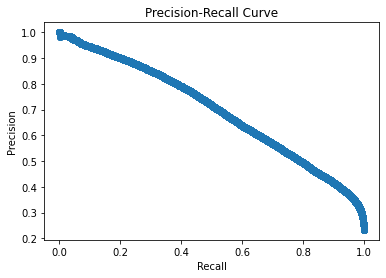

In [25]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

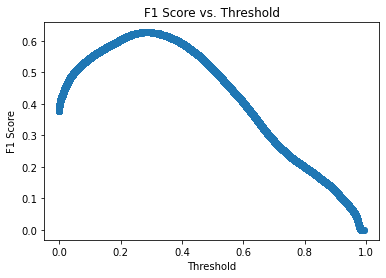

In [26]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

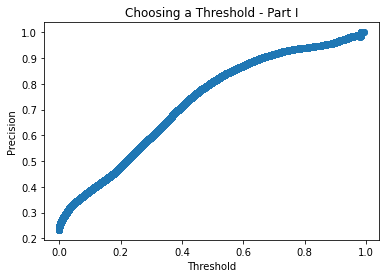

In [27]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

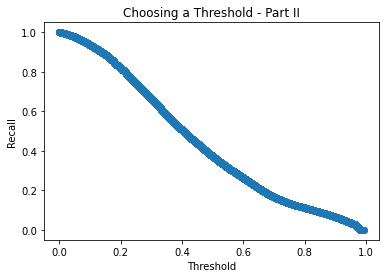

In [28]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [29]:
curve['Thresholds'][np.argmax(f1_scores)]

0.28461745

In [30]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[8.27941954e-01 2.67097056e-02 3.44591490e-06 1.39122421e-03
 2.86164004e-02 6.72392488e-01 2.69617364e-02 3.04528534e-01
 1.85253583e-02 5.71411178e-02 6.30551577e-01 2.24770263e-01
 1.17088566e-02 1.97337102e-02 1.23467118e-01 1.18746445e-01
 3.80309336e-02 6.29199296e-02 1.70445666e-01 2.96594918e-01
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.25254509e-08 1.25254509e-08 1.25254509e-08
 1.25254509e-08 1.252545

In [31]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
types = np.load("Types.npy", allow_pickle = True)
print(types[0])

[b'ege' b'\x00`\x01?' b'' b'\x00\xa0\x01?' b'' b'ee' b'' b'\x00\xe0\x05?'
 b'' b'\x00 \x06?' b'ee' b'\x00X$?' b'' b'\x008&?' b'' b'ee' b''
 b'\x00p$?' b'' b"\x000'?"]


In [33]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])
    
print(filt_pred[0], filt_act[0])

[0.82794195] [1.]


In [34]:
filt_type = []

for i in range(len(predicted)):
    mask = compton[i].astype(int).astype(bool)
    filt_type.append(types[i][mask])

print(filt_type[0])

[b'ege']


In [35]:
print(set([len(typ) for typ in filt_type]))

{0, 1, 2}


In [36]:
new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
                                                                     np.hstack(np.array(filt_pred)))

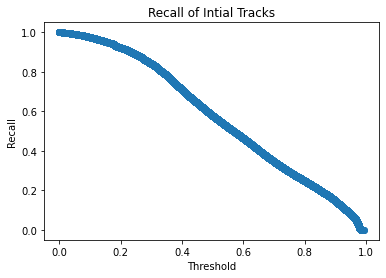

In [37]:
plt.figure()
plt.scatter(new_thresholds, new_recalls[:-1])
plt.title('Recall of Intial Tracks')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [38]:
unpad_pred = []
unpad_act = []
mean_acc = 0

for i in range(len(predicted)):
    orig_pred = predicted[i][:len(compton[i])]
    orig_act = actual[i][:len(compton[i])]
    unpad_pred.append(orig_pred)
    unpad_act.append(orig_act)
    mean_acc += accuracy_score(orig_pred >= 0.5, orig_act)

print(mean_acc / len(predicted))

0.7979413417670553


In [39]:
compare_pred = [1.0 * (unpad >= 0.4) for unpad in unpad_pred]
print(compare_pred[0], unpad_act[0])

[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [40]:
accuracies = [accuracy_score(*pair) for pair in zip(compare_pred, unpad_act)]
print(np.mean(accuracies))

0.7991870089201959


In [41]:
filt_pred_new = [1.0 * (filt >= 0.4) for filt in filt_pred]
print(filt_pred_new[0], filt_act[0])

[1.] [1.]


In [58]:
filt_act = [filt for filt in filt_act if len(filt) > 0]
filt_pred_new = [filt for filt in filt_pred_new if len(filt) > 0]
filt_accs = [accuracy_score(*pair) for pair in zip(filt_pred_new, filt_act)]
print(np.mean(filt_accs))

0.710521559255317


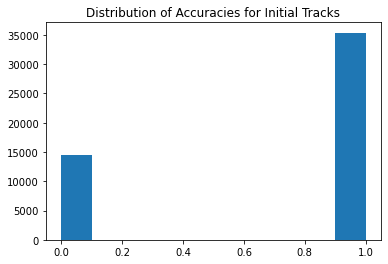

In [59]:
plt.hist(filt_accs)
plt.title('Distribution of Accuracies for Initial Tracks');

In [61]:
elec_acc_list = [filt_p[0] == filt_a[0] for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]
# gamma_acc_list = [filt_p[1] == filt_a[1] if len(filt_p) >= 2 else False for (filt_p, filt_a) in zip(filt_pred_new, filt_act)]

elec_acc = sum(elec_acc_list) / len(elec_acc_list)
print(elec_acc)
# gamma_acc = sum(gamma_acc_list) / len(gamma_acc_list)
# print(elec_acc, gamma_acc)

0.7106219749764023


In [62]:
def calc_rates(predicted, actual):
    
    TP = FP = TN = FN = 0

    for i in range(len(predicted)): 
        pred, act = predicted[i], actual[i]
        
        for j in range(len(pred)):
            if act[j] == pred[j] == 1:
                TP += 1
            if pred[j] == 1 and act[j] != pred[j]:
                FP += 1
            if act[j] == pred[j] == 0:
                TN += 1
            if pred[j] == 0 and act[j] != pred[j]:
                FN += 1
    
    return TP / (TP + FN), FN / (TP + FN)

In [63]:
calc_rates(filt_pred_new, filt_act)

(0.7102231676968772, 0.28977683230312273)